<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Nueva sección

In [0]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/Salary_Data.csv',delimiter=';')
x = data1.iloc [:,:-1]
y = data1.iloc [:,1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=0)

# Escalado de variables
# en este ejemplo no es necesario lo dejaremos comentariado
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#x_train = sc_x.fit.transform(x_train)
#x_test = sc_x.fit.transform(x_test)

### Modelo de regresión lineal simple. 
### método minimos cuadrados

In [10]:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
regresion.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predecir el conjunto de test

In [0]:
y_pred= regresion.predict(x_test)

### Visualizar los resulados del entenamiento

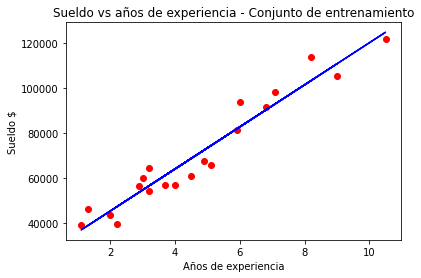

In [13]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regresion.predict(x_train), color="blue")
plt.title("Sueldo vs años de experiencia - Conjunto de entrenamiento")
plt.xlabel ("Años de experiencia")
plt.ylabel ("Sueldo $")
plt.show()